In [3]:
import scipy.misc as misc
import numpy as np
import matplotlib.pyplot as plt

def readImage(filename):
    f = misc.imread(filename, flatten=True).astype("float")
    return f

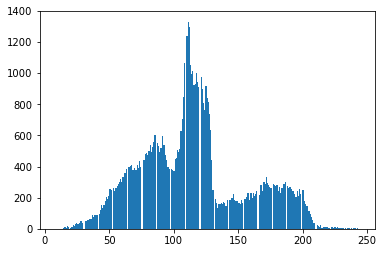

In [14]:
bauckhage = readImage('images/bauckhage.jpg')

plt.hist(bauckhage.ravel(), bins=257)
plt.show()

hist = np.histogram(bauckhage.ravel(), bins=np.arange(257), normed=True)[0]
cumHist = np.cumsum(hist)

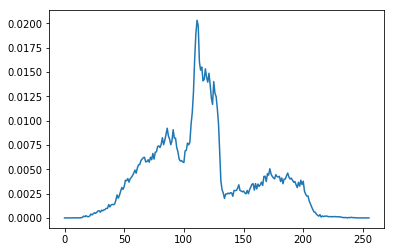

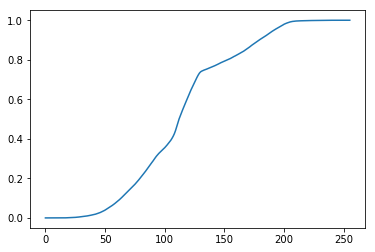

(256,)
(256,)


In [16]:
plt.figure()
plt.plot(np.arange(256), hist)
plt.figure()
plt.plot(np.arange(256), cumHist)
plt.show()
print (hist.shape)
print (cumHist.shape)

In [27]:
def transWeibull(H, l, k):
    a = 1. - H
    b = np.array( [ np.log(1. / i) if i != 0 else 0 for i in cumHist] )
    c = b**(1. / k)
    d = c*l
    return d

T = transWeibull(cumHist, 40., 2.)

print (T.shape)

(256,)


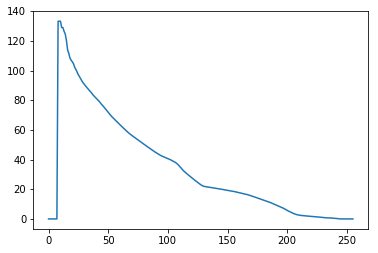

In [28]:
plt.figure()
plt.plot(np.arange(256), T)
plt.show()

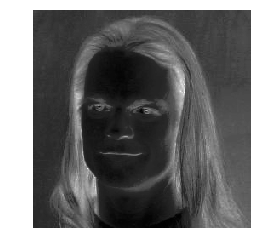

In [33]:
image_equalized = np.interp(bauckhage.flatten(), np.arange(256), T)
plt.imshow(image_equalized.reshape(bauckhage.shape),  cmap='gray')
plt.axis('off')
plt.show()